In [2]:
### Discrete Dynamical Systems ###

# setting pretty_print as default print method
pretty_print_default(True)

In [3]:
# introducing some variables
var('x, y, alpha')

(x, y, alpha)

In [4]:
# simplification and substitution
X = ((x^2 + alpha*x) / x)
X

(alpha*x + x^2)/x

In [5]:
X.full_simplify()

alpha + x

In [6]:
X.subs(alpha == 3)

(x^2 + 3*x)/x

In [7]:
## Discrete flow from Sheet 2, Exercis 3

f(x,y) = (x / (alpha*x -1), (y + alpha*x*(x-y))/(alpha*x-1))
f

(x, y) |--> (x/(alpha*x - 1), (alpha*(x - y)*x + y)/(alpha*x - 1))

In [8]:
# iteration of the flow (composition)
f(*f(x,y))

(x/((alpha*x - 1)*(alpha*x/(alpha*x - 1) - 1)), -(alpha*x*((alpha*(x - y)*x + y)/(alpha*x - 1) - x/(alpha*x - 1))/(alpha*x - 1) - (alpha*(x - y)*x + y)/(alpha*x - 1))/(alpha*x/(alpha*x - 1) - 1))

In [9]:
# component-wise simplification
f(*f(x,y)).apply_map(lambda x:x.full_simplify())

(x, y)

In [10]:
## Introducing another discrete flow (implicitly)

var('x_1,y_1')
X1 = (x_1 -x) == alpha*(x_1*y + x*y_1)
X1

-x + x_1 == (x_1*y + x*y_1)*alpha

In [11]:
Y1 = (y_1 - y) == -2 * x* x_1
Y1

-y + y_1 == -2*x*x_1

In [13]:
# explicit flow from solving a linear system
X2, Y2 = solve([X1, Y1], x_1,y_1)[0]
X2, Y2

(x_1 == (alpha*x*y + x)/(2*alpha*x^2 - alpha*y + 1),
 y_1 == -(alpha*y^2 + 2*x^2 - y)/(2*alpha*x^2 - alpha*y + 1))

In [16]:
# definition of the actual flow map
g(x,y) = (X2.rhs(), Y2.rhs())
g

(x, y) |--> ((alpha*x*y + x)/(2*alpha*x^2 - alpha*y + 1), -(alpha*y^2 + 2*x^2 - y)/(2*alpha*x^2 - alpha*y + 1))

In [17]:
# a function on the phase space
F(x,y) = (x^2 + alpha*y^2) / (1+ alpha*x^2)
F

(x, y) |--> (alpha*y^2 + x^2)/(alpha*x^2 + 1)

In [18]:
# checking that F is an integral of motion
bool( F(*g(x,y)).full_simplify() == F(x,y) )

True

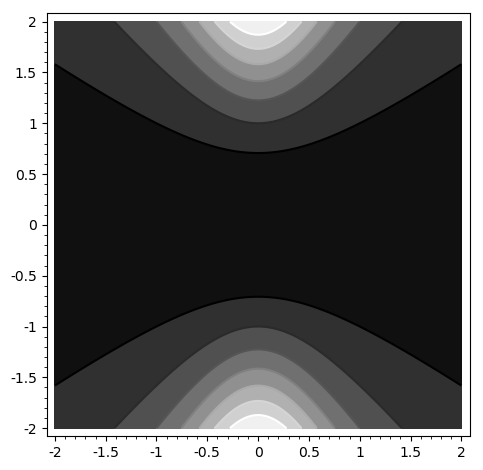

In [20]:
# contour plot for F
A = (alpha == 2)
N = 2
plot1 = contour_plot(F.subs(A), (x,-N,N), (y,-N,N))
plot1

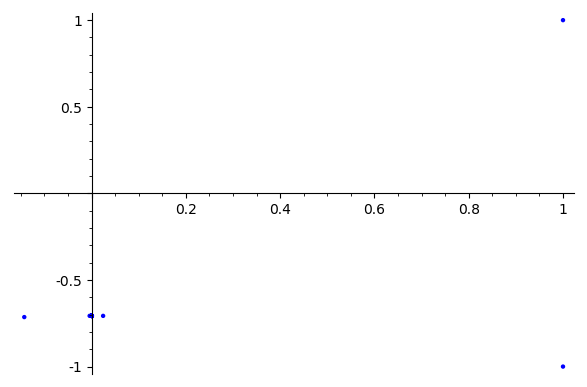

In [22]:
# computing N points of an orbit
def gN(x_0, y_0, N):
    values = [(x_0, y_0)]
    for _ in range(N):
        x_0, y_0 = g.subs(A)(x_0,y_0)
        values.append((x_0,y_0))
    return values

list_plot(gN(1,1,100))

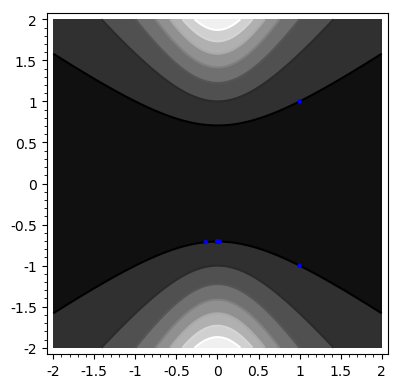

In [23]:
# adding plots (note the zorder option)
plot1 + list_plot(gN(1,1,100), zorder=10)